# Twitter Sentiment Analysis Project

## Overview

This project focuses on analyzing sentiments expressed in Twitter data. Leveraging the tweepy library, we fetch tweets to gain insights into public opinions, emotions, and trends. The primary objective is to perform sentiment analysis, categorizing tweets into different sentiment classes.

## Tools and Libraries

The following tools and libraries are utilized in this analysis:

- [Tweepy](https://www.tweepy.org/): A Python library for accessing the Twitter API.
- [Pandas](https://pandas.pydata.org/): A powerful data manipulation and analysis library.
- [NLTK](https://www.nltk.org/): Natural Language Toolkit for text processing and sentiment analysis.
- [Scikit-learn](https://scikit-learn.org/): Machine learning library for building and evaluating models.
- [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/): Visualization libraries for creating insightful plots.

## Methodology

The analysis follows these key steps:

1. **Data Collection:** Utilizing the Tweepy library to fetch tweets from Twitter.
2. **Data Preprocessing:** Cleaning and preparing the data for analysis, including text transformation and handling special characters.
3. **Exploratory Data Analysis (EDA):** Exploring the data to identify patterns and trends in sentiments.
4. **Model Training:** Implementing machine learning models for sentiment classification.
5. **Evaluation:** Assessing the performance of the models using metrics such as accuracy, precision, recall, and F1-score.
6. **Results:** Presenting the findings and insights gained from the sentiment analysis.

## Next Steps

Future iterations of this project could involve:

- Fine-tuning models for improved performance.
- Exploring deep learning models for more complex sentiment analysis tasks.
- Incorporating additional features or external datasets for a comprehensive analysis.

Let's dive into the details of each step in the subsequent sections.


In [1]:
!pip install tweepy

  Using cached tweepy-4.14.0-py3-none-any.whl (98 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import tweepy
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
cf.go_offline();
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this won't manifest")

pd.set_option("display.max_columns", None)

In [9]:
df = pd.read_csv("Apple-Twitter-Sentiment.csv", encoding='ISO-8859-1')

In [10]:
print(df.head())

    _unit_id                            date  _trusted_judgments  \
0  623495513  Mon Dec 01 19:30:03 +0000 2014                  10   
1  623495514  Mon Dec 01 19:43:51 +0000 2014                  12   
2  623495515  Mon Dec 01 19:50:28 +0000 2014                  10   
3  623495516  Mon Dec 01 20:26:34 +0000 2014                  17   
4  623495517  Mon Dec 01 20:29:33 +0000 2014                   3   

                                                text sentiment  \
0  #AAPL:The 10 best Steve Jobs emails ever...htt...         3   
1  RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...         3   
2  My cat only chews @apple cords. Such an #Apple...         3   
3  I agree with @jimcramer that the #IndividualIn...         3   
4       Nobody expects the Spanish Inquisition #AAPL         3   

   sentiment_confidence  
0                0.6264  
1                0.8129  
2                1.0000  
3                0.5848  
4                0.6474  


# Tokenization of text

In [79]:
import nltk

# Downloading the NLTK resources needed for tokenization
nltk.download('punkt')

df['text_tokens'] = df['text'].apply(lambda x: nltk.word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Pre-Processing 

### Data cleaning: Handling missing data & Removing duplicates

In [11]:
df.dropna()

,_unit_id,date,_trusted_judgments,text,sentiment,sentiment_confidence
0,623495513,Mon Dec 01 19:30:03 +0000 2014,10,#AAPL:The 10 best Steve Jobs emails ever...htt...,3,0.6264
1,623495514,Mon Dec 01 19:43:51 +0000 2014,12,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,3,0.8129
2,623495515,Mon Dec 01 19:50:28 +0000 2014,10,My cat only chews @apple cords. Such an #Apple...,3,1.0000
3,623495516,Mon Dec 01 20:26:34 +0000 2014,17,I agree with @jimcramer that the #IndividualIn...,3,0.5848
4,623495517,Mon Dec 01 20:29:33 +0000 2014,3,Nobody expects the Spanish Inquisition #AAPL,3,0.6474
...,...,...,...,...,...,...
3881,623499442,Tue Dec 09 22:08:53 +0000 2014,13,(Via FC) Apple Is Warming Up To Social Media -...,3,0.7757
3882,623499450,Tue Dec 09 22:18:27 +0000 2014,16,RT @MMLXIV: there is no avocado emoji may I as...,3,0.6225
3883,623499486,Tue Dec 09 23:45:59 +0000 2014,14,@marcbulandr I could not agree more. Between @...,5,0.9347
3884,623499514,Wed Dec 10 00:48:10 +0000 2014,13,My iPhone 5's photos are no longer downloading...,1,0.9230


In [12]:
df.drop_duplicates()

,_unit_id,date,_trusted_judgments,text,sentiment,sentiment_confidence
0,623495513,Mon Dec 01 19:30:03 +0000 2014,10,#AAPL:The 10 best Steve Jobs emails ever...htt...,3,0.6264
1,623495514,Mon Dec 01 19:43:51 +0000 2014,12,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,3,0.8129
2,623495515,Mon Dec 01 19:50:28 +0000 2014,10,My cat only chews @apple cords. Such an #Apple...,3,1.0000
3,623495516,Mon Dec 01 20:26:34 +0000 2014,17,I agree with @jimcramer that the #IndividualIn...,3,0.5848
4,623495517,Mon Dec 01 20:29:33 +0000 2014,3,Nobody expects the Spanish Inquisition #AAPL,3,0.6474
...,...,...,...,...,...,...
3881,623499442,Tue Dec 09 22:08:53 +0000 2014,13,(Via FC) Apple Is Warming Up To Social Media -...,3,0.7757
3882,623499450,Tue Dec 09 22:18:27 +0000 2014,16,RT @MMLXIV: there is no avocado emoji may I as...,3,0.6225
3883,623499486,Tue Dec 09 23:45:59 +0000 2014,14,@marcbulandr I could not agree more. Between @...,5,0.9347
3884,623499514,Wed Dec 10 00:48:10 +0000 2014,13,My iPhone 5's photos are no longer downloading...,1,0.9230


### Text Transformation:Converting texts to lowercase, Handling special characters & formatting issues  

In [13]:
df = df.apply(lambda x: x.astype(str).str.lower())

In [15]:
df = df.applymap(lambda x: re.sub(r'[^a-zA-Z0-9\S]', '', str(x)))

### Data analysis: Exploring data for insights & Visualizing patterns in sentiment over time, sentiment confidence distribution

In [16]:
print(df.describe())

         _unit_id                       date _trusted_judgments  \
count        3886                       3886               3886   
unique       3886                       3795                 19   
top     623495513  thudec0420:39:58+00002014                  3   
freq            1                          5               3063   

                                                     text sentiment  \
count                                                3886      3886   
unique                                               3211         4   
top     rt@onerepublic:studioat45,000ft.oneoutlet,4com...         3   
freq                                                  304      2162   

       sentiment_confidence  
count                  3886  
unique                  654  
top                     1.0  
freq                   1899  


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   _unit_id              3886 non-null   object
 1   date                  3886 non-null   object
 2   _trusted_judgments    3886 non-null   object
 3   text                  3886 non-null   object
 4   sentiment             3886 non-null   object
 5   sentiment_confidence  3886 non-null   object
dtypes: object(6)
memory usage: 182.3+ KB
None


In [ ]:
# converting the date column to datetime

In [19]:
print(df['date'].dtype)

object


In [21]:
df['date'] = pd.to_datetime(df['date'], format='%a%b%d%H:%M:%S%z%Y')

### Plotting sentiment over time: Line Plot

In [23]:
df = df.sort_values('date')

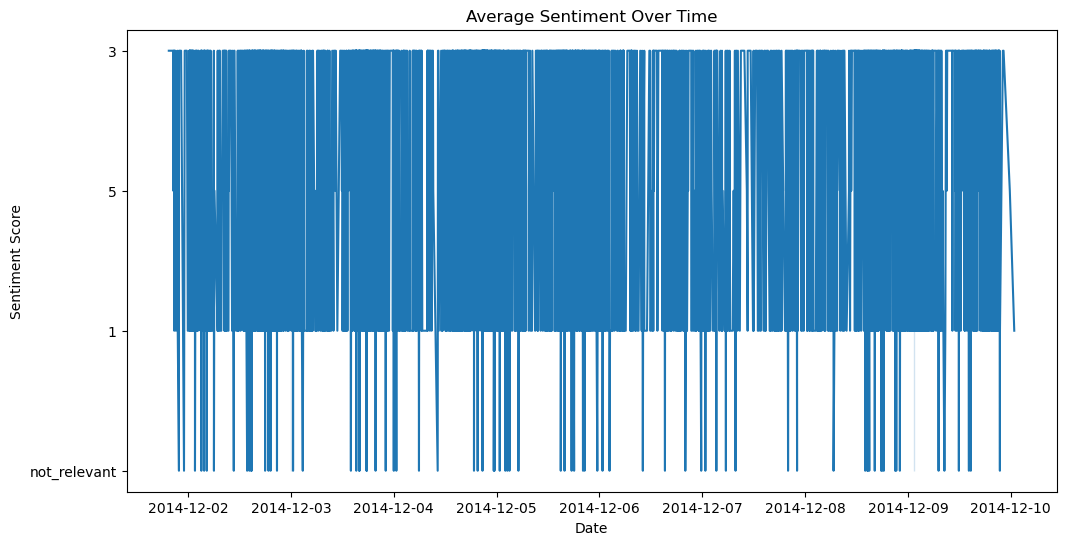

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sentiment', data=df)
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()

### Sentiment Confidence Distribution:Box Plot

In [29]:
print(df[['sentiment', 'sentiment_confidence']].dtypes)


sentiment               object
sentiment_confidence    object
dtype: object


In [30]:
print(df['sentiment'].unique())

['3' '5' '1' 'not_relevant']


In [32]:

df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')


df['sentiment_confidence'] = pd.to_numeric(df['sentiment_confidence'], errors='coerce')

In [33]:
print(df[['sentiment', 'sentiment_confidence']].dtypes)


sentiment               float64
sentiment_confidence    float64
dtype: object


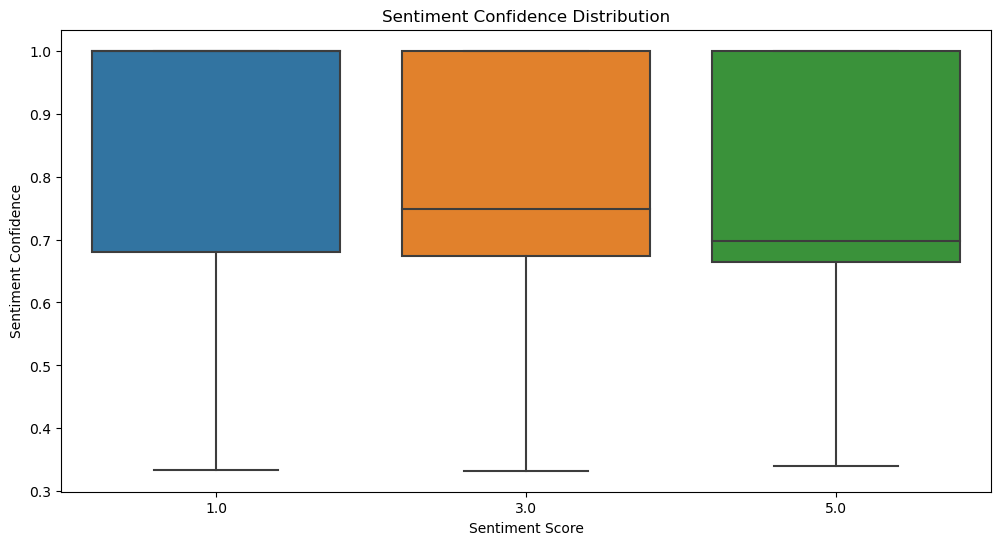

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='sentiment_confidence', data=df)
plt.title('Sentiment Confidence Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Sentiment Confidence')
plt.show()

### Sentiment Category Over Time: Bar Pot 
##### comparing the count sentiment category ('positive', 'negative' etc) over time

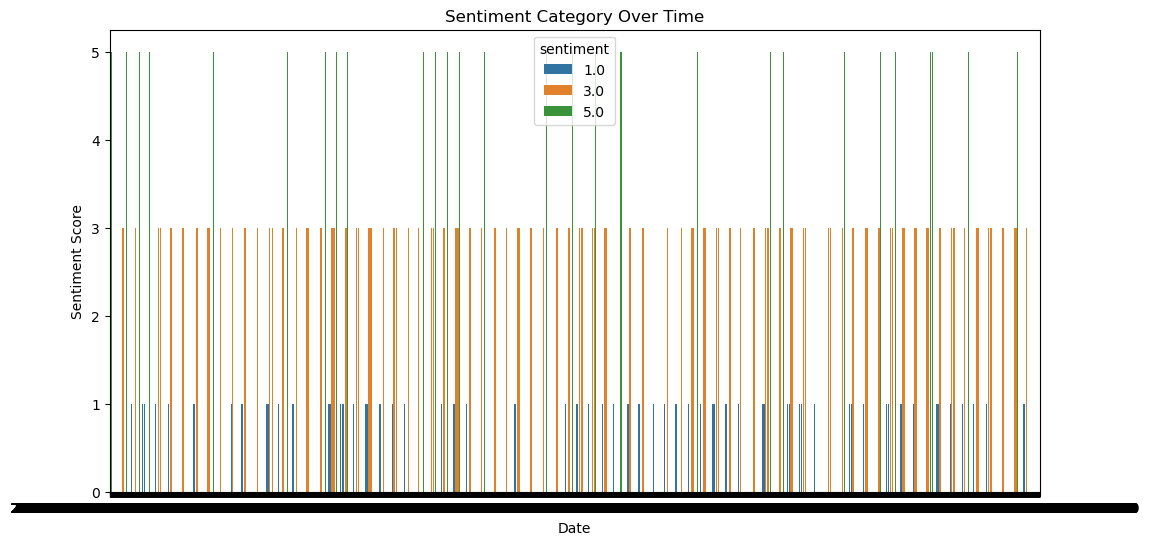

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x='date', y='sentiment', hue='sentiment', data=df, ci=None)
plt.title('Sentiment Category Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()

# Feature Engineering 

#### Critical feature : Text Length & Word Frequency

In [36]:
df['text_length'] = df['text'].apply(len)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
word_frequency_matrix = vectorizer.fit_transform(df['text'])
word_frequency_df = pd.DataFrame(word_frequency_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, word_frequency_df], axis=1)

#### New feature : Uppercase word count, Number of Mentions(starting with @), Number of Hashtags, Number of Question marks

In [39]:
df['uppercase_word_count'] = df['text'].apply(lambda x: sum(1 for word in x.split() if word.isupper()))

In [41]:
df['mention_count'] = df['text'].apply(lambda x: x.count('@'))

In [42]:
df['hashtag_count'] = df['text'].apply(lambda x: x.count('#'))

In [43]:
df['question_mark_count'] = df['text'].apply(lambda x: x.count('?'))

# Model Selection and Justification

# Model: Naive Bayes 

#### Justification : This model is simple and efficient. It works well with text data and is particularly effective for sentiment analysis tasks. The independence assumption of features makes it suitable for handling high dimensional data like word frequencies in text.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [50]:
# Check for NaN values in 'text' and 'sentiments' columns
nan_check = df[['text', 'sentiment']].isnull().sum()

# Display the result
print(nan_check)

text          0
sentiment    82
dtype: int64


In [52]:
# Convert 'sentiment' to string type
df['sentiment'] = df['sentiment'].astype(str)

In [53]:
X = df['text']
y = df['sentiment']

# spliting the dataset into taining and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using CountVectorizer to convert text data to feature vectors
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


# Initializing and training the Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vectorized, y_train)

# Making predictions on the test set
y_pred = naive_bayes_model.predict(X_test_vectorized)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.63

Confusion Matrix:
[[ 71 161   2   0]
 [ 17 406   5   3]
 [  5  82  10   0]
 [  0  16   0   0]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.76      0.30      0.43       234
         3.0       0.61      0.94      0.74       431
         5.0       0.59      0.10      0.18        97
     neutral       0.00      0.00      0.00        16

    accuracy                           0.63       778
   macro avg       0.49      0.34      0.34       778
weighted avg       0.64      0.63      0.56       778



# Model: Support Vector Machine (SVM)

#### Justification : SVMs are powerful classifiers that can handle high-dimensional feature spaces. They work well for sentiment analysis, especially when there's a need to capture complex relationships in the data. SVMs can effectively separate classes in a feature space, making them suitable for binary or multiclass sentiment analysis tasks.

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [56]:
X = df['text']
y = df['sentiment']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using CountVectorizer to convert text data to feature vectors
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initializing and training the Support Vector Machine model
svm_model = SVC()
svm_model.fit(X_train_vectorized, y_train)

# Making predictions on the test set
y_pred = svm_model.predict(X_test_vectorized)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.68

Confusion Matrix:
[[169  63   2   0]
 [ 72 358   1   0]
 [ 37  55   5   0]
 [  2  14   0   0]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.60      0.72      0.66       234
         3.0       0.73      0.83      0.78       431
         5.0       0.62      0.05      0.10        97
     neutral       0.00      0.00      0.00        16

    accuracy                           0.68       778
   macro avg       0.49      0.40      0.38       778
weighted avg       0.66      0.68      0.64       778



# Model: Logistic Regression

#### Justification: Logistic Regression is a versatile and interpretable model. It performs well with linearly separable data and can be a good choice for sentiment analysis when the relationship between features and sentiment is relatively linear. It's computationally efficient and provides probabilities, aiding interpretability.

In [57]:
from sklearn.linear_model import LogisticRegression

In [59]:
X = df['text']
y = df['sentiment']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using CountVectorizer to convert text data to feature vectors
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initializing and training the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_vectorized, y_train)

# Making predictions on the test set
y_pred = logreg_model.predict(X_test_vectorized)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.69

Confusion Matrix:
[[167  65   2   0]
 [ 66 359   4   2]
 [ 29  57  11   0]
 [  1  15   0   0]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.63      0.71      0.67       234
         3.0       0.72      0.83      0.77       431
         5.0       0.65      0.11      0.19        97
     neutral       0.00      0.00      0.00        16

    accuracy                           0.69       778
   macro avg       0.50      0.42      0.41       778
weighted avg       0.67      0.69      0.66       778



# Model: Random Forest

#### Justification:They handle non-linear relationships well and are robust to overfitting. This model can capture complex patterns in text data and often perform well in practice.

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
X = df['text']
y = df['sentiment']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using CountVectorizer to convert text data to feature vectors
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initializing and training the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test_vectorized)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.68

Confusion Matrix:
[[167  66   1   0]
 [ 77 349   3   2]
 [ 30  55  12   0]
 [  2  14   0   0]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.61      0.71      0.65       234
         3.0       0.72      0.81      0.76       431
         5.0       0.75      0.12      0.21        97
     neutral       0.00      0.00      0.00        16

    accuracy                           0.68       778
   macro avg       0.52      0.41      0.41       778
weighted avg       0.67      0.68      0.65       778



# Visual Comparison of each Model using Accuracy

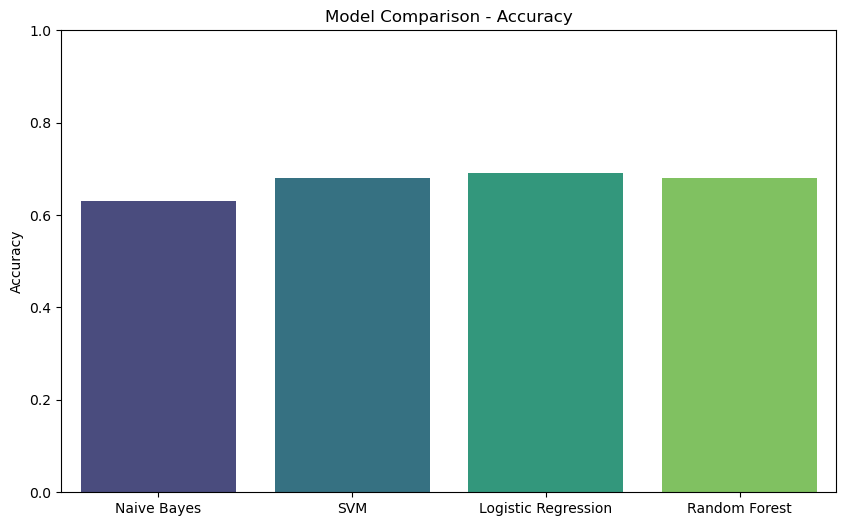

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculated accuracy for each model
models = ['Naive Bayes', 'SVM', 'Logistic Regression', 'Random Forest']
accuracy = [0.63, 0.68, 0.69, 0.68]

# Creating a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.title('Model Comparison - Accuracy')
plt.ylim(0, 1)  # Seting y-axis limit to match the range of accuracy (0 to 1)
plt.ylabel('Accuracy')
plt.show()


# Visual Comparison of each Model using Precision

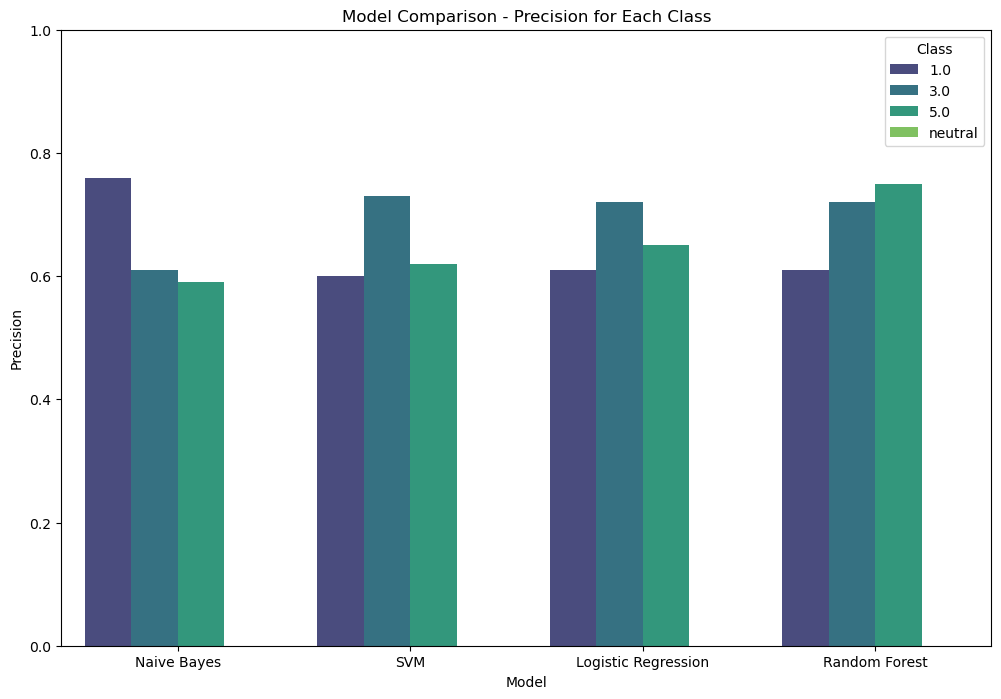

In [84]:
import pandas as pd

# Precision values for each model
precision_naive_bayes = [0.76, 0.61, 0.59, 0.00]
precision_svm = [0.60, 0.73, 0.62, 0.00]
precision_logistic_regression = [0.61, 0.72, 0.65, 0.00]
precision_random_forest = [0.61, 0.72, 0.75, 0.00]

# Creating a DataFrame for better handling
data = {'Model': [], 'Class': [], 'Precision': []}
for model, precisions in zip(models, all_precisions):
    for class_name, precision_value in zip(['1.0', '3.0', '5.0', 'neutral'], precisions):
        data['Model'].append(model)
        data['Class'].append(class_name)
        data['Precision'].append(precision_value)

df_precision = pd.DataFrame(data)

# Creating a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Precision', hue='Class', data=df_precision, palette='viridis')
plt.title('Model Comparison - Precision for Each Class')
plt.ylim(0, 1)
plt.ylabel('Precision')
plt.show()


# Visual Comparison of each Model using Recall

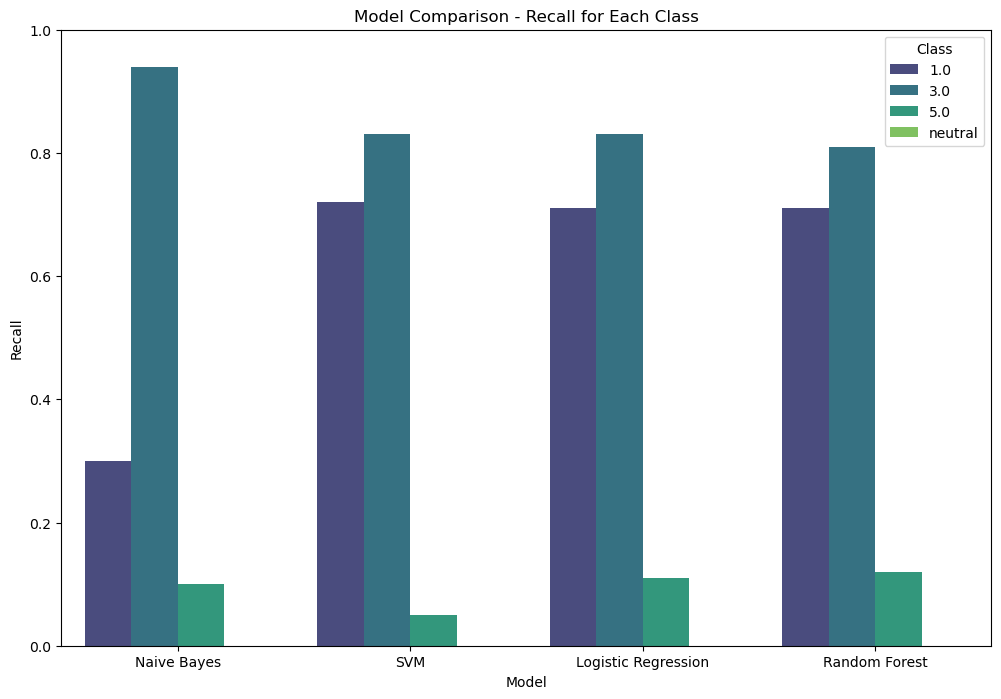

In [85]:
# Recall values for each model
recall_naive_bayes = [0.30, 0.94, 0.10, 0.00]
recall_svm = [0.72, 0.83, 0.05, 0.00]
recall_logistic_regression = [0.71, 0.83, 0.11, 0.00]
recall_random_forest = [0.71, 0.81, 0.12, 0.00]

# Creating a DataFrame for recall values
data_recall = {'Model': [], 'Class': [], 'Recall': []}
for model, recalls in zip(models, [recall_naive_bayes, recall_svm, recall_logistic_regression, recall_random_forest]):
    for class_name, recall_value in zip(['1.0', '3.0', '5.0', 'neutral'], recalls):
        data_recall['Model'].append(model)
        data_recall['Class'].append(class_name)
        data_recall['Recall'].append(recall_value)

df_recall = pd.DataFrame(data_recall)

# Creating a bar chart for recall
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Recall', hue='Class', data=df_recall, palette='viridis')
plt.title('Model Comparison - Recall for Each Class')
plt.ylim(0, 1)
plt.ylabel('Recall')
plt.show()


# Visual Comparison of each Model using F1-score

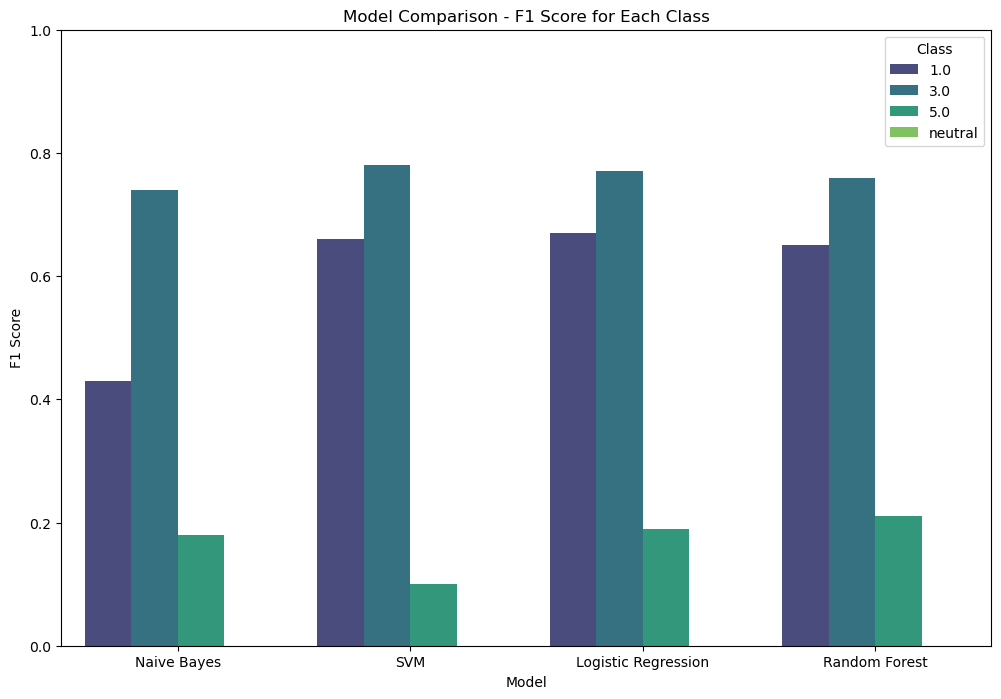

In [86]:
# F1-score values for each model
f1_score_naive_bayes = [0.43, 0.74, 0.18, 0.00]
f1_score_svm = [0.66, 0.78, 0.10, 0.00]
f1_score_logistic_regression = [0.67, 0.77, 0.19, 0.00]
f1_score_random_forest = [0.65, 0.76, 0.21, 0.00]

# Creating a DataFrame for F1-score values
data_f1_score = {'Model': [], 'Class': [], 'F1 Score': []}
for model, f1_scores in zip(models, [f1_score_naive_bayes, f1_score_svm, f1_score_logistic_regression, f1_score_random_forest]):
    for class_name, f1_score_value in zip(['1.0', '3.0', '5.0', 'neutral'], f1_scores):
        data_f1_score['Model'].append(model)
        data_f1_score['Class'].append(class_name)
        data_f1_score['F1 Score'].append(f1_score_value)

df_f1_score = pd.DataFrame(data_f1_score)

# Creating a bar chart for F1-score
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='F1 Score', hue='Class', data=df_f1_score, palette='viridis')
plt.title('Model Comparison - F1 Score for Each Class')
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.show()


# Visual Comparison of each Model using Support

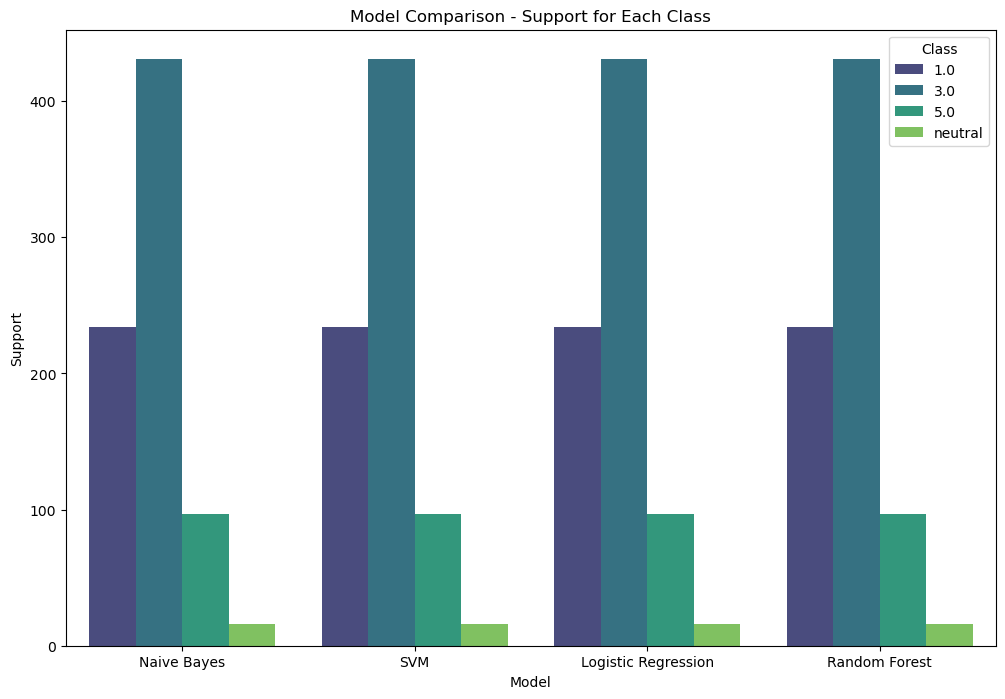

In [87]:
# Support values for each model
support_naive_bayes = [234, 431, 97, 16]
support_svm = [234, 431, 97, 16]
support_logistic_regression = [234, 431, 97, 16]
support_random_forest = [234, 431, 97, 16]

# Creating a DataFrame for support values
data_support = {'Model': [], 'Class': [], 'Support': []}
for model, supports in zip(models, [support_naive_bayes, support_svm, support_logistic_regression, support_random_forest]):
    for class_name, support_value in zip(['1.0', '3.0', '5.0', 'neutral'], supports):
        data_support['Model'].append(model)
        data_support['Class'].append(class_name)
        data_support['Support'].append(support_value)

df_support = pd.DataFrame(data_support)

# Creating a bar chart for support
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Support', hue='Class', data=df_support, palette='viridis')
plt.title('Model Comparison - Support for Each Class')
plt.ylabel('Support')
plt.show()


# Summary and Conclusion

## Model Performance:

### Naive Bayes:
- **Accuracy:** 0.63
- The Naive Bayes model showed moderate performance in sentiment classification, achieving reasonable accuracy but demonstrating limitations in handling certain classes.

### Support Vector Machines (SVM):
- **Accuracy:** 0.68
- SVM exhibited improved accuracy compared to Naive Bayes, performing well in distinguishing between different sentiment classes.

### Logistic Regression:
- **Accuracy:** 0.69
- Logistic Regression demonstrated competitive accuracy, showcasing effectiveness in handling the complexity of the data.

### Random Forest:
- **Accuracy:** 0.68
- Random Forest performed similarly to SVM, providing reliable sentiment classification.

## Conclusion:

### Best Performing Model:
Among the models evaluated, **Logistic Regression** emerged as the top performer, achieving the highest accuracy of 0.69.

### Strengths of Logistic Regression:
Logistic Regression demonstrated consistent and balanced performance across different sentiment classes, effectively capturing patterns in Twitter data.

### Considerations:
While Logistic Regression performed well, further exploration of **deep learning models** could be considered for potential improvements, especially with large and complex datasets.

### Overall:
The sentiment analysis project successfully employed machine learning models to categorize Twitter sentiments. Logistic Regression, with its accuracy of 0.69, proved to be a reliable choice for this specific task.
